In [1]:
import pandas as pd
from google.colab import files

df = files.upload()
data = pd.read_csv('MedHouseVal.csv')

Saving MedHouseVal.csv to MedHouseVal.csv


**Exploratory Data Analysis**

In [2]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

**Missing Values**

In [5]:
missing_column = data.isnull().sum()
missing_column

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


**There are no missing values in this data**

**Data Visualization**

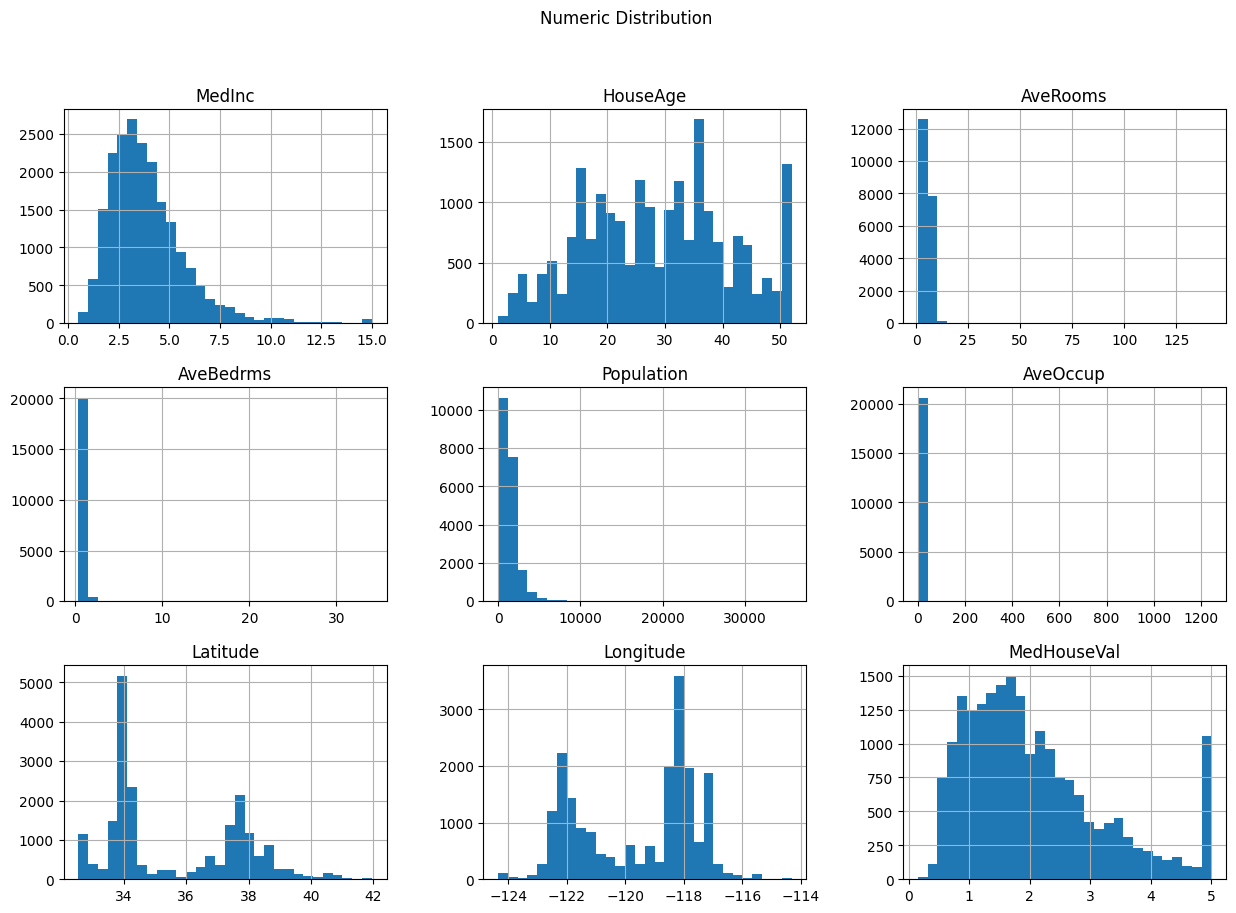

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

data.select_dtypes(include=['float64']).hist(bins=30,figsize=(15,10))
plt.suptitle('Numeric Distribution')
plt.tight_layout
plt.show()


In [10]:
drop_column = ['MedHouseVal']

**Split Data**

In [17]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=drop_column)
y = data.MedHouseVal

TrainX,ValX,TrainY,ValY = train_test_split(X,y,
                                           test_size=0.3,
                                           random_state=42)

numeric_features = TrainX.columns

TrainX.shape, ValX.shape

((14448, 8), (6192, 8))

**Preprocessing**

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numerical_transform = Pipeline(steps=[
    ('scaler',StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num',numerical_transform,numeric_features)
    ]
)

TrainXScaled = preprocessor.fit_transform(TrainX)
ValXScaled = preprocessor.transform(ValX)

**Mutual Information**

In [25]:
from sklearn.feature_selection import mutual_info_regression

TrainXMI = preprocessor.fit_transform(TrainX)

feature_name = list(numeric_features)

mi_scores = mutual_info_regression(
    TrainXMI,TrainY,random_state=42
)

mi_series = pd.Series(mi_scores, index = feature_name)
mi_series = mi_series.sort_values(ascending=False)

mi_series

,0
Longitude,0.387503
MedInc,0.382067
Latitude,0.362962
AveRooms,0.090700
AveOccup,0.075625
HouseAge,0.034174
Population,0.024259
AveBedrms,0.021514


<function matplotlib.pyplot.show(close=None, block=None)>

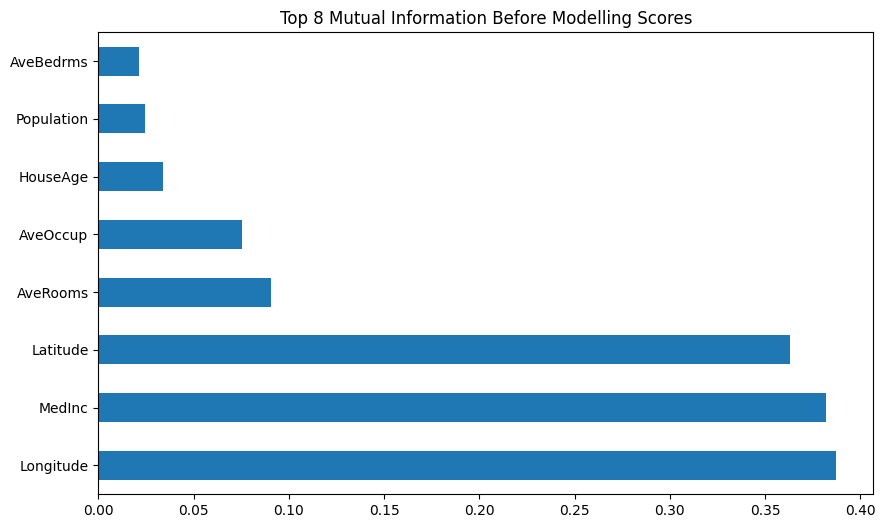

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
mi_series.head(8).plot(kind='barh')
plt.title("Top 8 Mutual Information Before Modelling Scores")
plt.show